In [15]:
# Packages 
import numpy as np
import pandas as pd
from faker import Faker
import random


In [17]:
# Create a student marks system using NumPy + Pandas where you can:
# 1 Store student info and marks
# 2 Compute totals, averages
# 3 Label Pass/Fail
# 4 Analyze/filter data



In [18]:
# Generating Student's Names .. 

fake = Faker()
name_of_students = []
# Specifiy the number of names you want..
n = 50 
# Generate and print 'n' random names
for i in range(n):
    random_name = fake.name()
    name_of_students.append(random_name)
    
print(name_of_students)    

['Corey Jordan', 'Sharon Fox', 'Lisa Newton', 'Nicole Leonard', 'Daniel Tucker', 'Diana Lawrence', 'Ashley Gardner', 'Monique Peterson', 'Alicia Molina', 'Melissa Johnson', 'Tami Jordan', 'Danielle Smith', 'Randy Graham', 'Barbara Scott', 'Denise Fitzgerald', 'Matthew Thomas', 'Christopher Hunt', 'Marc Marshall', 'Jade Sampson', 'William Cowan', 'Anthony Harris', 'Tonya Patton', 'Lisa Lindsey', 'Heather Gonzalez', 'Karen Carter', 'Susan Walker', 'Lisa Cooke', 'Carol Stevens', 'Brian Stuart', 'Cynthia Davis', 'Chris Guerrero', 'James Vance', 'Claudia Obrien', 'Sandra Mitchell', 'Angela Sandoval', 'Dwayne Navarro', 'Travis Kramer', 'Amy Rodriguez', 'Brett Salazar', 'Brianna Smith', 'Scott Lewis', 'James Wells', 'Sheila Hendricks', 'Heather Copeland', 'Kevin Byrd', 'Melanie Lee', 'Tiffany Rodriguez MD', 'Michael Jackson', 'Nicole Taylor', 'Jon Taylor']


In [19]:
# Generating Age for Students 

age_of_students = []
n = 50
for i in range(n):
 age  = random.randint(10,20)
 age_of_students.append(age)

print(age_of_students) 

[15, 12, 20, 14, 14, 19, 13, 19, 10, 19, 20, 12, 16, 20, 16, 18, 15, 18, 17, 18, 14, 10, 10, 15, 17, 15, 16, 16, 18, 12, 18, 12, 13, 13, 10, 12, 15, 12, 12, 18, 18, 15, 18, 20, 18, 12, 17, 16, 18, 15]


In [24]:
# Generating Marks for Students 

marks_of_students = []
n = 50 
for i in range(n):
    marks = random.randint(1,100)
    marks_of_students.append(marks)

print(marks_of_students)    


[19, 80, 35, 2, 89, 57, 91, 22, 92, 3, 57, 36, 57, 59, 30, 25, 83, 16, 39, 91, 90, 50, 45, 84, 13, 60, 56, 30, 88, 63, 38, 83, 92, 16, 95, 18, 17, 62, 63, 21, 25, 50, 63, 15, 73, 29, 71, 87, 84, 42]


In [ ]:
# DataSet Creation 

data = {
    "name_of_students":name_of_students,
    "age_of_students":age_of_students,
    "marks_of_students":marks_of_students
}

df = pd.DataFrame(data)

print(type(df))
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
name_of_students     object
age_of_students       int64
marks_of_students     int64
dtype: object


In [28]:
# Computing Total Marks 
result = df["marks_of_students"].sum()
print("Total Marks of the 50 stuents are : ",result)

Total Marks of the 50 stuents are :  2606


In [34]:
# computing average marks 
number_of_students  = len(df["marks_of_students"])
total_marks = df["marks_of_students"].sum()
print(total_marks)
print("The Average marks of the students is : ",(total_marks/number_of_students))

2606
The Average marks of the students is :  52.12


In [ ]:
# Decide Pass/Fail threshold (e.g., ≥60 → Pass)
print(df.dtypes)
def check(marks):
    if(marks >=60):
        return "Pass"
    else:
        return "Fail"
df["result_of_students"]  = df["marks_of_students"].apply(check)
print(df.head(20))

name_of_students      object
age_of_students        int64
marks_of_students      int64
result_of_students    object
dtype: object
     name_of_students  age_of_students  marks_of_students result_of_students
0        Corey Jordan               15                 19               Fail
1          Sharon Fox               12                 80               Pass
2         Lisa Newton               20                 35               Fail
3      Nicole Leonard               14                  2               Fail
4       Daniel Tucker               14                 89               Pass
5      Diana Lawrence               19                 57               Fail
6      Ashley Gardner               13                 91               Pass
7    Monique Peterson               19                 22               Fail
8       Alicia Molina               10                 92               Pass
9     Melissa Johnson               19                  3               Fail
10        Tami Jordan  

In [44]:
# Find students with highest marks 
highest_marks = df["marks_of_students"].max()
print(highest_marks)

highest_marks_student = df[df["marks_of_students"] == highest_marks]["name_of_students"]
print(highest_marks_student.iloc[0])


95
Angela Sandoval


In [45]:
# Filter students who failed

students_who_failed = df[df["marks_of_students"] < 60]
print(students_who_failed)

     name_of_students  age_of_students  marks_of_students result_of_students
0        Corey Jordan               15                 19               Fail
2         Lisa Newton               20                 35               Fail
3      Nicole Leonard               14                  2               Fail
5      Diana Lawrence               19                 57               Fail
7    Monique Peterson               19                 22               Fail
9     Melissa Johnson               19                  3               Fail
10        Tami Jordan               20                 57               Fail
11     Danielle Smith               12                 36               Fail
12       Randy Graham               16                 57               Fail
13      Barbara Scott               20                 59               Fail
14  Denise Fitzgerald               16                 30               Fail
15     Matthew Thomas               18                 25               Fail

In [55]:
# Group by age  compute average marks
number_of_student = len(df["age_of_students"].drop_duplicates())
result = df.groupby("age_of_students")["marks_of_students"].mean()

print(result)

age_of_students
10    70.500000
12    54.250000
13    66.333333
14    60.333333
15    50.714286
16    52.000000
17    41.000000
18    52.400000
19    27.333333
20    41.500000
Name: marks_of_students, dtype: float64


In [60]:
# Sort students by total marks

sorted_students = df.sort_values("marks_of_students",ascending=False)
print(sorted_students.head(10))

    name_of_students  age_of_students  marks_of_students result_of_students
34   Angela Sandoval               10                 95               Pass
8      Alicia Molina               10                 92               Pass
32    Claudia Obrien               13                 92               Pass
19     William Cowan               18                 91               Pass
6     Ashley Gardner               13                 91               Pass
20    Anthony Harris               14                 90               Pass
4      Daniel Tucker               14                 89               Pass
28      Brian Stuart               18                 88               Pass
47   Michael Jackson               16                 87               Pass
23  Heather Gonzalez               15                 84               Pass


<Axes: >

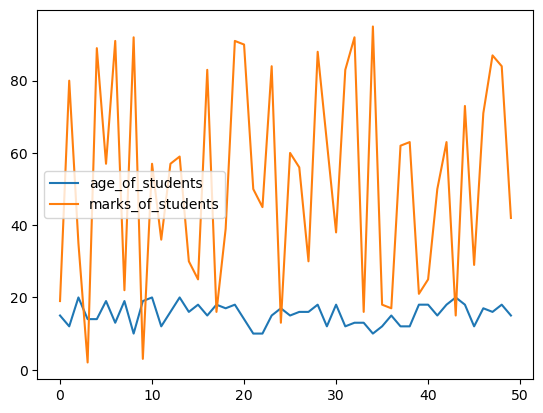

In [61]:
# Visualize using .plot() (if you want a graph later)
df.plot()